# What is Makeup Made of?: Chemicals in Cosmetics
This dataset originates from California’s landmark Safe Cosmetics Act of 2005, which requires transparency around hazardous ingredients in cosmetics sold in the state. Administered by the California Safe Cosmetics Program (CSCP) within the Department of Public Health, the Act mandates that manufacturers, packers, and distributors of cosmetic products sold in California disclose ingredients known or suspected to cause cancer, birth defects, or other reproductive harm. Reporting is required for companies with at least $1 million in annual aggregate sales and products sold in California on or after January 1, 2007. To support compliance, the CDPH provides a reference list of chemicals compiled from authoritative scientific bodies, including those cited in California’s Proposition 65 and by the International Agency for Research on Cancer, though this list is not exhaustive.

The resulting dataset captures a wide range of product and chemical information: label names, company and brand names, product categories (e.g., lipstick, shampoo), ingredient names, Chemical Abstracts Service (CAS) numbers, number of reported chemicals per product, and regulatory timelines such as reporting, discontinuation, or reformulation dates. While it offers an unprecedented level of transparency, the dataset is not comprehensive, as some products may not appear due to company non-compliance or reformulation that removes a listed ingredient.

Beyond documentation, this resource matters because it empowers consumers, researchers, and advocates to uncover hidden risks in everyday beauty products and to push for safer formulations. It has fueled public health research into chemical exposures and disparities across populations, as well as advocacy campaigns led by groups such as the Environmental Working Group. In short, the CSCP dataset represents a critical step toward greater accountability and consumer protection in an industry long marked by limited federal oversight.


Source: https://catalog.data.gov/dataset/chemicals-in-cosmetics-d55bf

##Import and load data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os


# Download dataset
path = kagglehub.dataset_download("nafayunnoor/toxic-beauty-chemicals-exposed")
print("Path to dataset files:", path)

100%|██████████| 1.83M/1.83M [00:00<00:00, 124MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nafayunnoor/toxic-beauty-chemicals-exposed/versions/1


In [ ]:
# List all files in the dataset path
print(os.listdir(path))

df = pd.read_csv(os.path.join(path, "Chemicals in Makeup.csv"))
display(df.head())

['Chemicals in Makeup.csv']


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,6/17/2009,8/28/2013,2/1/2011,7/9/2009,7/9/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),7/1/2009,7/1/2009,NaN,7/1/2009,7/1/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,7/1/2009,7/1/2009,NaN,7/2/2009,7/2/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,7/9/2009,8/28/2013,NaN,7/9/2009,7/9/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,7/9/2009,8/28/2013,2/1/2011,7/9/2009,7/9/2009,NaN,1


##Exploratory Data Analysis

In [ ]:
#Inspect data types
df.info()
df.shape
df.columns

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values per column
print("Number of missing values per column:")
display(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

,0
CDPHId,0
ProductName,0
CSFId,33973
CSF,34398
CompanyId,0
CompanyName,0
BrandName,227
PrimaryCategoryId,0
PrimaryCategory,0
SubCategoryId,0


In [ ]:
date_columns = ['InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Display the data types to confirm the conversion
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  114635 non-null  int64         
 1   ProductName             114635 non-null  object        
 2   CSFId                   80662 non-null   float64       
 3   CSF                     80237 non-null   object        
 4   CompanyId               114635 non-null  int64         
 5   CompanyName             114635 non-null  object        
 6   BrandName               114408 non-null  object        
 7   PrimaryCategoryId       114635 non-null  int64         
 8   PrimaryCategory         114635 non-null  object        
 9   SubCategoryId           114635 non-null  int64         
 10  SubCategory             114635 non-null  object        
 11  CasId                   114635 non-null  int64         
 12  CasNumber               108159

None

**##Brand-level Toxicity: Comparing Number of Toxins across Brands**

Which brands have the *highest* average number of hazardous chemicals per product?



In [ ]:
brand_toxicity = df.groupby('BrandName')['ChemicalCount'].mean().sort_values(ascending=False)
brand_toxicity.head(10)  # most toxic

,ChemicalCount
BrandName,
Mastercuts,6.363636
Regis Design Line,5.867347
Careline,4.461538
Dermaminerals,4.000000
PALLADIO,4.000000
Dermaquest Skin Therapy,4.000000
Costcutters,4.000000
Zoeva,4.000000
Perfectly Pure,3.600000


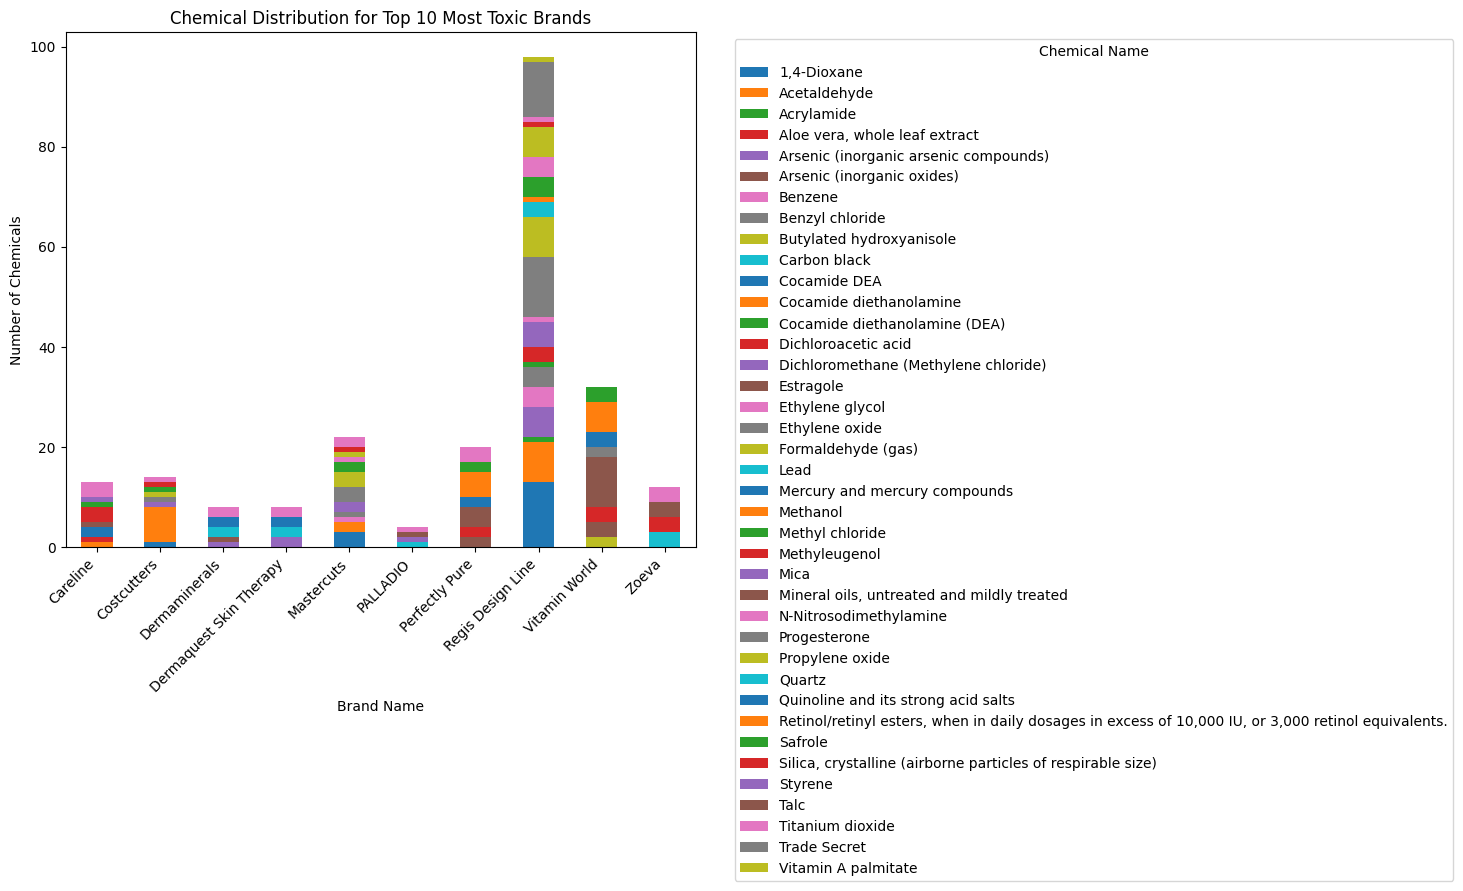

In [ ]:
# Recalculate brand_toxicity as it seems it was not in the current session
brand_toxicity = df.groupby('BrandName')['ChemicalCount'].mean().sort_values(ascending=False)


# Get the top 10 most toxic brands
top_10_brands = brand_toxicity.head(10).index

# Filter the original DataFrame to include only the top 10 brands
df_top_10 = df[df['BrandName'].isin(top_10_brands)]

# Group by BrandName and ChemicalName and count the occurrences
chemical_counts_per_brand = df_top_10.groupby(['BrandName', 'ChemicalName']).size().unstack(fill_value=0)

# Create a stacked bar chart
chemical_counts_per_brand.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Chemical Distribution for Top 10 Most Toxic Brands')
plt.xlabel('Brand Name')
plt.ylabel('Number of Chemicals')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Chemical Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 Conversely, which brands have the *lowest* average number of hazardous chemicals per product? In other words, which ones are safest?

In [ ]:
brand_toxicity = df.groupby('BrandName')['ChemicalCount'].mean().sort_values(ascending=True)
brand_toxicity.head(10)  # most toxic

,ChemicalCount
BrandName,
enMotion�,0.0
[comfort zone],0.0
Usher,0.0
SunSmile,0.0
Topps,0.0
Triple S,0.0
VO5,0.0
Smooth N Shine,0.0
Silk Elements,0.0


Taking a step back, now let's investigate which chemicals are most frequently reported.

In [ ]:
chemical_counts = df['ChemicalName'].value_counts()
chemical_counts.head(20)  # 20 most common toxic chemicals


##Machine Learning K-Means Clustering

In [ ]:
#Identify brands that are similar in chemical structure

# Pivot table: Brands vs Chemicals
brand_chem_matrix = df.pivot_table(
    index='BrandName',
    columns='ChemicalName',
    values='ChemicalCount',  # number of times chemical occurs
    aggfunc='sum',
    fill_value=0
)

brand_chem_matrix.head()


ChemicalName,"1,4-Dioxane","2,2-Bis(bromomethyl)-1,3-propanediol","2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)",2-Propyleneacrolein,Acetaldehyde,"Acetic acid, retinyl ester",Acetylsalicylic acid,Acrylamide,All-trans retinoic acid,"Aloe vera, non-decolorized whole leaf extract",...,Trade Secret,Trichloroacetic acid,Triethanolamine,Vinyl acetate,Vitamin A,Vitamin A palmitate,beta-Myrcene,o-Phenylenediamine and its salts,o-Phenylphenol,p-Aminodiphenylamine
BrandName,,,,,,,,,,,,,,,,,,,,,
Anastasia Beverly HIlls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Entity Nudite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gap Outlet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hard Candy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Innisfree,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Pivot table: Brands vs Chemicals
brand_chem_matrix = df.pivot_table(
    index='BrandName',
    columns='ChemicalName',
    values='ChemicalCount',  # number of times chemical occurs
    aggfunc='sum',
    fill_value=0
)

scaler = StandardScaler()
brand_scaled = scaler.fit_transform(brand_chem_matrix)

In [ ]:
from sklearn.cluster import KMeans

k = 5  # number of clusters, try 3-10 and see which makes sense
kmeans = KMeans(n_clusters=k, random_state=42)
brand_clusters = kmeans.fit_predict(brand_scaled)

# Add cluster labels to the original brands
brand_chem_matrix['Cluster'] = brand_clusters
brand_chem_matrix.head()


ChemicalName,"1,4-Dioxane","2,2-Bis(bromomethyl)-1,3-propanediol","2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)",2-Propyleneacrolein,Acetaldehyde,"Acetic acid, retinyl ester",Acetylsalicylic acid,Acrylamide,All-trans retinoic acid,"Aloe vera, non-decolorized whole leaf extract",...,Trichloroacetic acid,Triethanolamine,Vinyl acetate,Vitamin A,Vitamin A palmitate,beta-Myrcene,o-Phenylenediamine and its salts,o-Phenylphenol,p-Aminodiphenylamine,Cluster
BrandName,,,,,,,,,,,,,,,,,,,,,
Anastasia Beverly HIlls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Entity Nudite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Gap Outlet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Hard Candy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Innisfree,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
for cluster_num in range(k):
    print(f"\nCluster {cluster_num}:")
    print(brand_chem_matrix[brand_chem_matrix['Cluster']==cluster_num].index.tolist())



Cluster 0:
['Bliss', 'Careline', 'Houbigant', 'John Paul Mitchell Systems', "Nature's Gate", 'Perfectly Pure', "Puritan's Pride", 'Vitamin World']

Cluster 1:
[' Anastasia Beverly HIlls', ' Entity Nudite', ' Gap Outlet', ' Hard Candy', ' Innisfree ', ' Laneige ', ' Mary Kay', ' Mary Kay ', ' Menard', ' Moodmatcher', ' Too Faced ', '(do not use)', '(re)Fresh', '04 Heavens Nude', '07 Shimmer Shell', '08 Nude Elegance', '10 Corso Como', '100% natural origin', '1006', '12 Classic Red', "15 Mandarina's Mandarine", '2 Cruel', '2015 Summer Collection', '2015 WINTER COLLECTION', '2015 Winter Collection', '2016 Summer Collection', '231170002', '26 Velvet Red', '27 Secret Red', '29 Berry Red', '3 Teas', '3 minutes', '30 First Kiss', '33 Hurly Burly', '3D Aquarium Hand Soap', '4 East Cosmetics', '41 Sweet Blackberry', '43 Bubble Gum', '45 Dark Violet', '5000', '51 Love Secret', '52 Shiny Rubin', '53 Elegant Rubin', '54 Midnight Red', '55 Dark Rubin', '61 Crazy Lazy', '67 Dusty Purple', '69 Nude 

In [ ]:
# Calculate the average chemical counts for each cluster
cluster_means = brand_chem_matrix.groupby('Cluster').mean()

# Transpose the dataframe for easier viewing of chemical profiles per cluster
cluster_means_transposed = cluster_means.transpose()

display(cluster_means_transposed)

Cluster,0,1,2,3,4
ChemicalName,,,,,
"1,4-Dioxane",0.000,0.041821,0.0,77.0,0.0
"2,2-Bis(bromomethyl)-1,3-propanediol",0.000,0.001480,0.0,0.0,0.0
"2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)",1.875,0.001850,0.0,0.0,0.0
2-Propyleneacrolein,0.000,0.000370,0.0,0.0,0.0
Acetaldehyde,1.000,0.038120,0.0,46.0,0.0
...,...,...,...,...,...
Vitamin A palmitate,0.000,0.546262,0.0,7.0,0.0
beta-Myrcene,0.000,0.059215,0.0,0.0,0.0
o-Phenylenediamine and its salts,0.875,0.001480,0.0,0.0,0.0


This table shows the average count of each chemical for the brands in each of the 5 clusters.



*   Cluster 0: Brands in this cluster tend to have higher average counts of chemicals like 2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer) and Acetaldehyde compared to other clusters. They also show some presence of o-Phenylenediamine and its salts.
*   Cluster 1: This is the largest cluster and appears to represent brands with generally lower average counts across most chemicals, although some chemicals like Vitamin A palmitate and beta-Myrcene show some presence.
*  Cluster 2: This cluster has very low average counts for almost all chemicals listed, suggesting brands in this group generally report fewer of these specific chemicals.
*  Cluster 3: Brands in this cluster have significantly higher average counts for 1,4-Dioxane and Acetaldehyde compared to all other clusters, indicating a higher prevalence of these chemicals in this group.
*  Cluster 4: This cluster shows a higher average count for Trade Secret chemicals compared to most other clusters, suggesting brands in this group report a larger number of ingredients as trade secrets.









## Toxin by Product Type

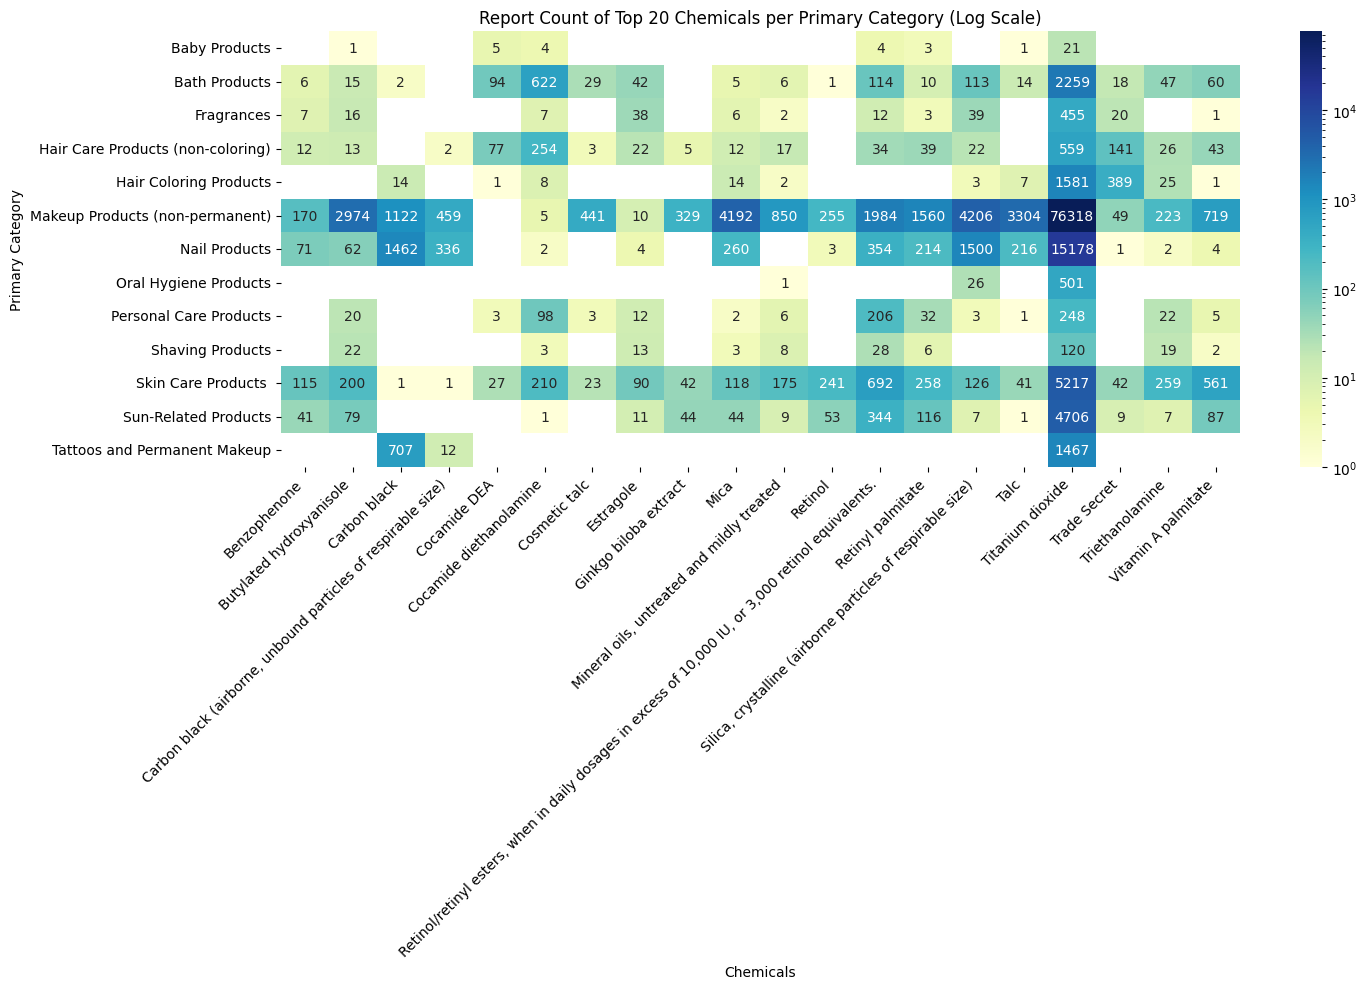

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm

# Get the top 20 most common chemicals
top_20_chemicals = df['ChemicalName'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 chemicals
df_top_20_chemicals = df[df['ChemicalName'].isin(top_20_chemicals)]

# Create a pivot table to get the count of each chemical per primary category
heatmap_data = df_top_20_chemicals.pivot_table(
    index='PrimaryCategory',
    columns='ChemicalName',
    values='ChemicalCount',
    aggfunc='sum',
    fill_value=0
)


plt.figure(figsize=(15, 10)) # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap="YlGnBu", norm=LogNorm())
plt.title("Report Count of Top 20 Chemicals per Primary Category (Log Scale)")
plt.xlabel("Chemicals")
plt.ylabel("Primary Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Map Chemicals to Carcinogen Groups

### Subtask:
Create a dictionary or similar structure to map the provided chemical names to their corresponding carcinogen classifications.


**Reasoning**:
Create a dictionary mapping the top 20 chemicals to their carcinogen classifications based on the provided list and print the dictionary.



In [ ]:
# Carcinogen classifications based on provided information:
# Group 1: Carcinogenic to humans
# Group 2A: Probably carcinogenic to humans
# Group 2B: Possibly carcinogenic to humans

carcinogen_info = {
    'Titanium dioxide': 'Group 2B',
    'Silica, crystalline (airborne particles of respirable size)': 'Group 1',
    'Carbon black (airborne, unbound particles of respirable size)': 'Group 2B',
    'Talc (contaminated with asbestos)': 'Group 1', # Assuming 'Talc' in the data could be contaminated
}

carcinogen_mapping = {chemical: classification for chemical, classification in carcinogen_info.items() if chemical in top_20_chemicals}

print(carcinogen_mapping)

{'Titanium dioxide': 'Group 2B', 'Silica, crystalline (airborne particles of respirable size)': 'Group 1', 'Carbon black (airborne, unbound particles of respirable size)': 'Group 2B'}


Carcinogens are ranked by the International Agency for Research on Cancer (IARC) into four groups based on the strength of evidence for their carcinogenicity: Group 1 (Carcinogenic to humans), Group 2A (Probably carcinogenic to humans), Group 2B (Possibly carcinogenic to humans), and Group 3 (Not classifiable as to carcinogenicity to humans).

In [ ]:
# Define Group 1 and Group 2A carcinogens based on the provided information
group1_carcinogens = [chemical for chemical, classification in carcinogen_mapping.items() if classification == 'Group 1']
group2a_carcinogens = [chemical for chemical, classification in carcinogen_mapping.items() if classification == 'Group 2A']

# Filter the DataFrame to include only Group 1 and Group 2A carcinogens
df_carcinogens = df[df['ChemicalName'].isin(group1_carcinogens + group2a_carcinogens)]

# Group by BrandName and sum the ChemicalCount for these carcinogens
brand_carcinogen_counts = df_carcinogens.groupby('BrandName')['ChemicalCount'].sum().sort_values(ascending=False)

# Display the brands with the highest counts of Group 1 and Group 2A carcinogens
print("Brands with the highest combined counts of Group 1 and Group 2A carcinogens:")
display(brand_carcinogen_counts.head(10))

Brands with the highest combined counts of Group 1 and Group 2A carcinogens:


,ChemicalCount
BrandName,
Charlotte Tilbury,2566
Entity,371
Artistic,331
Palladio,315
Gelish,313
Charlotte Tilbury Beauty Ltd,267
Red Carpet Manicure,187
MILANI,169
Kandesn,166


The list includes well-known makeup, skincare, and nail product companies:

*   Charlotte Tilbury / Charlotte Tilbury Beauty Ltd – luxury makeup and skincare.
*   Entity, Artistic, Gelish, Red Carpet Manicure – nail polish and nail care brands.
*   Palladio, MILANI, JORDANA – drugstore makeup brands.

*   Kandesen – skincare and wellness products.








Perform a Kruskal-Wallis test to compare the chemical counts of the top 10 brands with the highest chemical counts and interpret the results. If the test is significant, perform a post-hoc test to identify which specific pairs of brands have statistically significant differences in chemical counts.

In [ ]:
df_top_10_highest_kruskal = df[df['BrandName'].isin(top_10_highest_brands)].copy()
display(df_top_10_highest_kruskal.head())

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
4524,1314,Volumizing Shampoo 12oz,NaN,NaN,116,Regis Corporation,Costcutters,18,Hair Care Products (non-coloring),25,...,68603-42-9,1441,Cocamide diethanolamine,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,1
4526,1316,Volumizing Shampoo 33.8oz.,NaN,NaN,116,Regis Corporation,Costcutters,18,Hair Care Products (non-coloring),25,...,68603-42-9,1443,Cocamide diethanolamine,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,1
4529,1319,Moisturizing Shampoo 12oz,NaN,NaN,116,Regis Corporation,Costcutters,18,Hair Care Products (non-coloring),25,...,68603-42-9,1445,Cocamide diethanolamine,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,1
4530,1320,Moisturizing Shampoo 33.8oz,NaN,NaN,116,Regis Corporation,Costcutters,18,Hair Care Products (non-coloring),25,...,68603-42-9,1448,Cocamide diethanolamine,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,1
4531,1321,Tea Tree Shampoo 12oz,NaN,NaN,116,Regis Corporation,Costcutters,18,Hair Care Products (non-coloring),25,...,68603-42-9,1449,Cocamide diethanolamine,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,1


In [ ]:
brand_chemical_counts_list = []

for brand in top_10_highest_brands:
    chemical_counts = df_top_10_highest_kruskal[df_top_10_highest_kruskal['BrandName'] == brand]['ChemicalCount'].tolist()
    brand_chemical_counts_list.append(chemical_counts)

print(brand_chemical_counts_list)

[[1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 2, 2, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 4, 4, 4, 4], [1, 3, 3, 3, 5, 5, 5, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5, 1, 1, 1], [4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4], [1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4], [6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5], [1, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5]]


## Perform kruskal-wallis test

Use the `kruskal` function from `scipy.stats` to perform the Kruskal-Wallis H test on the chemical counts of the top 10 brands.


In [ ]:
from scipy.stats import kruskal

h_statistic, p_value_kruskal = kruskal(*brand_chemical_counts_list)

print(f"Kruskal-Wallis H statistic: {h_statistic}")
print(f"P-value (Kruskal-Wallis): {p_value_kruskal}")

Kruskal-Wallis H statistic: 48.19194112676049
P-value (Kruskal-Wallis): 2.3515331190968321e-07


In [ ]:
alpha = 0.05

print(f"Significance level (alpha): {alpha}")
print(f"Kruskal-Wallis P-value: {p_value_kruskal}")

if p_value_kruskal < alpha:
    print("The p-value is less than the significance level.")
    print("Conclusion: There is a statistically significant difference in chemical counts among the top 10 brands with the highest average chemical counts.")
else:
    print("The p-value is not less than the significance level.")
    print("Conclusion: There is no statistically significant difference in chemical counts among the top 10 brands with the highest average chemical counts.")

print("\nInterpretation:")
if p_value_kruskal < alpha:
    print("The statistically significant result indicates that at least one of the top 10 brands has a chemical count distribution that is significantly different from at least one other brand in this group.")
else:
    print("The non-significant result suggests that there is no strong evidence to conclude that the chemical count distributions are different among the top 10 brands with the highest average chemical counts.")

Significance level (alpha): 0.05
Kruskal-Wallis P-value: 2.3515331190968321e-07
The p-value is less than the significance level.
Conclusion: There is a statistically significant difference in chemical counts among the top 10 brands with the highest average chemical counts.

Interpretation:
The statistically significant result indicates that at least one of the top 10 brands has a chemical count distribution that is significantly different from at least one other brand in this group.


## Perform post-hoc test



In [ ]:
# Install scikit-posthocs if not already installed
# !pip install scikit-posthocs

import scikit_posthocs as sp

# Perform Dunn's test
dunn_results = sp.posthoc_dunn(brand_chemical_counts_list, p_adjust='bonferroni')

# Add brand names as row and column indices for better readability
dunn_results.columns = top_10_highest_brands
dunn_results.index = top_10_highest_brands

# Display the resulting DataFrame
display(dunn_results)

,Vitamin World,Perfectly Pure,Dermaminerals,Dermaquest Skin Therapy,Costcutters,Zoeva,PALLADIO,Careline,Regis Design Line,Mastercuts
Vitamin World,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.000029,0.000554
Perfectly Pure,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.009971,0.015930
Dermaminerals,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.676872
Dermaquest Skin Therapy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.676872
Costcutters,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.348234,0.227527
Zoeva,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.377063,0.231986
PALLADIO,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
Careline,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
Regis Design Line,0.000029,0.009971,1.000000,1.000000,0.348234,0.377063,1.0,1.0,1.000000,1.000000
Mastercuts,0.000554,0.015930,0.676872,0.676872,0.227527,0.231986,1.0,1.0,1.000000,1.000000


## Summarize findings



In [ ]:
# 1. Summarize Kruskal-Wallis test results
print("Summary of Statistical Analysis:")
print("-" * 30)
print(f"Kruskal-Wallis H test result:")
print(f"  H-statistic: {h_statistic:.4f}")
print(f"  P-value: {p_value_kruskal:.3e}")

alpha_kruskal = 0.05
if p_value_kruskal < alpha_kruskal:
    print(f"  Conclusion: The Kruskal-Wallis test is statistically significant at alpha={alpha_kruskal}, indicating that there is a significant difference in chemical counts among the top 10 brands.")
else:
    print(f"  Conclusion: The Kruskal-Wallis test is not statistically significant at alpha={alpha_kruskal}, indicating no significant difference in chemical counts among the top 10 brands.")

# 2. Mention post-hoc test if Kruskal-Wallis was significant
if p_value_kruskal < alpha_kruskal:
    print("\nSince the Kruskal-Wallis test was significant, a Dunn's post-hoc test with Bonferroni adjustment was performed to identify specific pairwise differences.")
    print("\nSummary of Dunn's Post-Hoc Test Results (Adjusted p-values < 0.05 indicate significant difference):")
    print("-" * 70)

    # 3. Summarize key findings from Dunn's test results
    alpha_dunn = 0.05
    significant_pairs = []
    for i in range(len(top_10_highest_brands)):
        for j in range(i + 1, len(top_10_highest_brands)):
            brand1 = top_10_highest_brands[i]
            brand2 = top_10_highest_brands[j]
            adjusted_p = dunn_results.loc[brand1, brand2] # Use .loc for DataFrame lookup
            if adjusted_p < alpha_dunn:
                significant_pairs.append(f"- {brand1} vs {brand2} (Adjusted p = {adjusted_p:.3e})")

    if significant_pairs:
        print("Statistically significant pairwise differences (Adjusted p < 0.05):")
        for pair in significant_pairs:
            print(pair)
    else:
        print("No statistically significant pairwise differences found among the top 10 brands after Bonferroni adjustment.")


# 4. Conclude with an overall statement
print("\nOverall Conclusion:")
if p_value_kruskal < alpha_kruskal:
    if significant_pairs:
        print("The statistical analysis reveals significant variability in chemical counts among the top 10 brands with the highest average chemical counts. Specifically, Dunn's test identified several pairs of brands that have statistically significant differences in their reported chemical counts.")
    else:
         print("The statistical analysis suggests some variability in chemical counts among the top 10 brands, although individual pairwise comparisons after adjustment did not reveal specific significant differences at the chosen alpha level.")
else:
    print("The statistical analysis did not find significant evidence of different chemical count distributions among the top 10 brands with the highest average chemical counts.")

Summary of Statistical Analysis:
------------------------------
Kruskal-Wallis H test result:
  H-statistic: 48.1919
  P-value: 2.352e-07
  Conclusion: The Kruskal-Wallis test is statistically significant at alpha=0.05, indicating that there is a significant difference in chemical counts among the top 10 brands.

Since the Kruskal-Wallis test was significant, a Dunn's post-hoc test with Bonferroni adjustment was performed to identify specific pairwise differences.

Summary of Dunn's Post-Hoc Test Results (Adjusted p-values < 0.05 indicate significant difference):
----------------------------------------------------------------------
Statistically significant pairwise differences (Adjusted p < 0.05):
- Vitamin World vs Regis Design Line (Adjusted p = 2.905e-05)
- Vitamin World vs Mastercuts (Adjusted p = 5.539e-04)
- Perfectly Pure vs Regis Design Line (Adjusted p = 9.971e-03)
- Perfectly Pure vs Mastercuts (Adjusted p = 1.593e-02)

Overall Conclusion:
The statistical analysis reveals s

## Summary:

### Data Analysis Key Findings

*   The Kruskal-Wallis H test showed a statistically significant difference in chemical counts among the top 10 brands with the highest average chemical counts (H-statistic = 48.19, p-value = 2.352e-07).
*   Dunn's post-hoc test with Bonferroni adjustment identified statistically significant pairwise differences in chemical counts between the following pairs of brands:
    *   Vitamin World vs Regis Design Line (Adjusted p = 2.905e-05)
    *   Vitamin World vs Mastercuts (Adjusted p = 5.539e-04)
    *   Perfectly Pure vs Regis Design Line (Adjusted p = 9.971e-03)
    *   Perfectly Pure vs Mastercuts (Adjusted p = 1.593e-02)

### Insights or Next Steps

*   The significant differences found between certain pairs of brands (e.g., Vitamin World vs Regis Design Line) highlight that even within the group of brands with the highest chemical counts, there is notable variation in their chemical profiles.
*   Further investigation could explore the specific types of chemicals contributing to the high counts in these differing brands and analyze the potential implications for consumers.
